In [1]:
from task2vec import Task2Vec
from models import get_model
import datasets
import task_similarity

In [ ]:
dataset_names = ('stl10', 'mnist', 'cifar10', 'cifar100', 'letters', 'kmnist')
# Change `root` with the directory you want to use to download the datasets
dataset_list = [datasets.__dict__[name](root='./data')[0] for name in dataset_names] 

In [ ]:
embeddings = []
for name, dataset in zip(dataset_names, dataset_list):
    print(f"Embedding {name}")
    probe_network = get_model('resnet34', pretrained=True, num_classes=int(max(dataset.targets)+1)).cuda()
    embeddings.append( Task2Vec(probe_network, max_samples=1000, skip_layers=6).embed(dataset) )

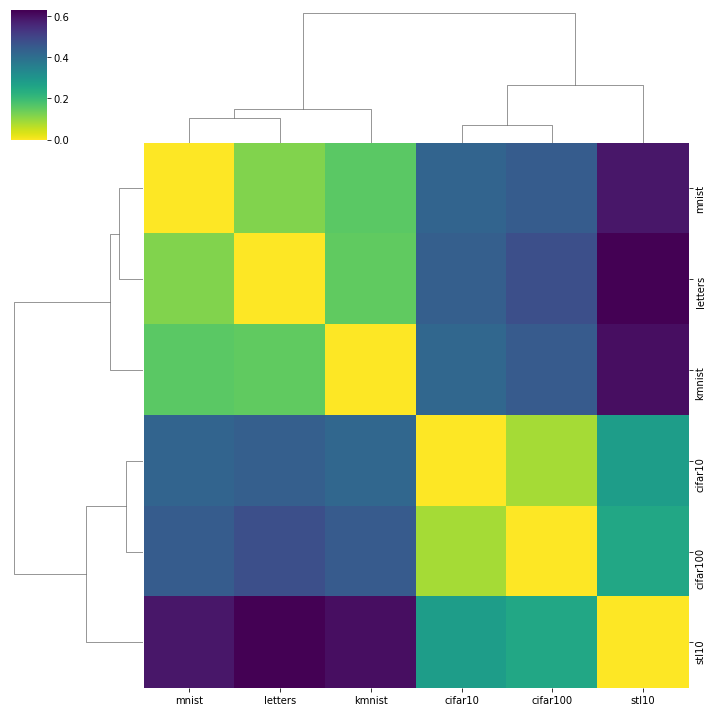

In [4]:
task_similarity.plot_distance_matrix(embeddings, dataset_names)